In [17]:
global region
region='nep'


import xarray as xr
import matplotlib.pyplot as plt

import os
import sys
sys.path.insert(0, os.path.abspath('..'))
from uwtrajectory.unified_traj_data import make_trajectory
import uwtrajectory.config as cfg
import numpy as np

%load_ext autoreload
%autoreload 2

cfg.MERRA_dir

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


PosixPath('/home/disk/eos4/jkcm/Data/MERRA/sea/new')

In [5]:
f = '/home/disk/eos8/diamond2/Data/SEVIRI/GEOS_tracks/valid_traj_20200120.nc'
data = xr.open_dataset(f)


adding ERA...
adding advection...
adding ERA sfc data...
adding SSMI...
adding CERES...


KeyError: 1501610400000000000

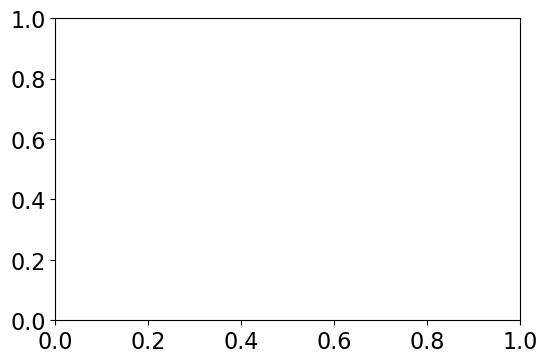

In [41]:
fig, ax = plt.subplots()
for i in data.ind:
    data_subs = data.sel(ind=i)
    data_subs['t'] = data_subs.time_init + [np.timedelta64(i, 'h') for i in data_subs.t.values]
    data_subs = data_subs.rename({'t': 'time'})
    data_subs = make_trajectory(data_subs, skip=['ERA_ens', 'MODIS_pbl', 'MERRA'], save=False)
    ax.plot(data_subs.lon, data_subs.lat)
    
    

In [6]:
data.isel(ind=1).lat

<xarray.DataArray 'lat' (t: 121)>
array([-25.      , -24.820578, -24.626978, -24.427692, -24.223896, -24.011992,
       -23.798615, -23.587736, -23.377125, -23.173759, -22.98024 , -22.7918  ,
       -22.60928 , -22.435358, -22.263123, -22.087326, -21.907156, -21.717205,
       -21.524441, -21.32962 , -21.130825, -20.932241, -20.729511, -20.519169,
       -20.304478, -20.083755, -19.853594, -19.625463, -19.39946 , -19.172447,
       -18.952614, -18.74077 , -18.534956, -18.33667 , -18.14489 , -17.957794,
       -17.773544, -17.593124, -17.417618, -17.245356, -17.077005, -16.913044,
       -16.750834, -16.589396, -16.427435, -16.259851, -16.087521, -15.910633,
       -15.730775, -15.54848 , -15.364924, -15.181275, -14.996349, -14.809806,
       -14.62136 , -14.427821, -14.228619, -14.033806, -13.843609, -13.659858,
       -13.485867, -13.320458, -13.164498, -13.021337, -12.890656, -12.771774,
       -12.65567 , -12.540361, -12.426044, -12.305975, -12.179925, -12.048031,
       -11.914529,